In [36]:
# load packages
import numpy as np
import pandas as pd
# import napari
import tifffile as tf
import matplotlib.pyplot as plt

# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# choose based on run in acadia or home computer
home_dir = "/mnt/labNAS/"
# home_dir = "/Volumes/Data/"

metadata = pd.read_csv("stp_metadata.csv")

in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
out_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/output_figs/"

# add paths to metadata
# output of mean_subtract_individuals.py
for i in range(metadata.shape[0]):
    b_path = in_path+"norm_subtracted/p05_mean_subtracted/"+metadata.loc[i, 'brain']+"_p05_NO_subtracted.tif"

    metadata.loc[i,"p05_path"] = b_path

# area list from make_masks.py
areas = ["grey", "CTX", "OMCi", "OMCc", "ACAi", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS", "HIP"]


In [10]:
# load masks for each individually aligned brain
from time import time
start = time()
# make dictionary where keys = areas, values=list of masks corresponding to metadata order
mask_dict = {}
for area in areas:
    area_masks = []
    print("working on", area)
    for i in range(metadata.shape[0]):
        print("\t", metadata.loc[i,"brain"])
        save_folder = in_path+"masks/"+metadata.loc[i,"brain"]+"_masks/"
        with open(save_folder+metadata.loc[i,"brain"]+"_"+area+".npy", "rb") as f:
            area_masks.append(np.load(f))
        
    mask_dict[area] = area_masks

# for area in mask_dict:
#     print(area, ": \t", len(mask_dict[area]))

end = time()
print("took", end-start, "seconds to load")

working on grey
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_MMus_230427_b3
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on CTX
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_MMus_230427_b3
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on OMCi
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_MMus_230427_b3
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on OMCc
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_MMus_230427_b3
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_22

In [7]:
# import images
# import images
p05_path = in_path+"norm_subtracted/p05_mean_subtracted/"
p05_images = []
for i in range(metadata.shape[0]):
    print("loading:", metadata.loc[i, "brain"])
    p05_images.append(tf.imread(p05_path+metadata.loc[i,'brain']+"_p05_NO_subtracted.tif"))


In [8]:
# set areas to focus on
areas_plot = ["OMCc", "ACAc", "aud", "CP", "AMY", "TH", "HY", 
              "SNr", "SCm", "PG", "PAG", "BS"]

In [12]:
all_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, 
                               areas_to_plot=areas_plot)

all_fluor

,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,OMCc,309.84705,11617.98,ACC_MMus_230403_b1,MMus,ACC
1,ACAc,1085.89226,2857.06,ACC_MMus_230403_b1,MMus,ACC
2,aud,66.86299,6602.36,ACC_MMus_230403_b1,MMus,ACC
3,CP,3110.44317,25513.74,ACC_MMus_230403_b1,MMus,ACC
4,AMY,46.32795,4212.38,ACC_MMus_230403_b1,MMus,ACC
...,...,...,...,...,...,...
139,SNr,307.80698,1055.94,OMC_STeg_220429_b2,STeg,OMC
140,SCm,1292.25799,5598.34,OMC_STeg_220429_b2,STeg,OMC
141,PG,290.36116,631.90,OMC_STeg_220429_b2,STeg,OMC
142,PAG,807.49084,3869.04,OMC_STeg_220429_b2,STeg,OMC


# MMus vs. STeg
- trying to make the point that there's little to no difference

## OMC

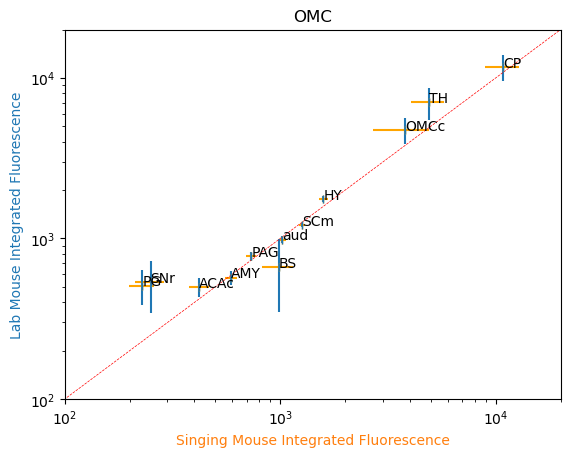

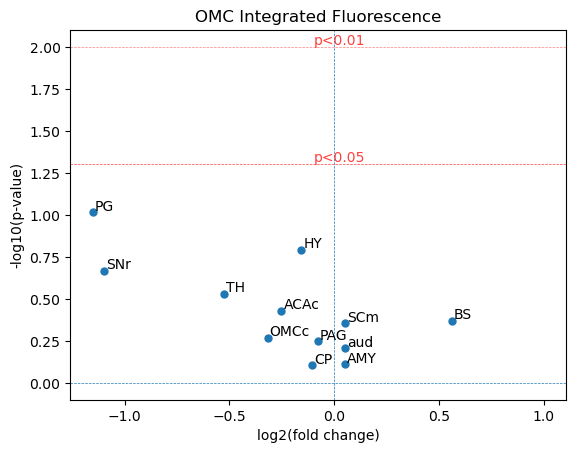

In [13]:
# scatterplot
omc_fluor = all_fluor[all_fluor["inj_site"]=="OMC"]

stvmm_area_scatter(omc_fluor, title="OMC", ax_limits=(100,20000))
plt.show()

#  Volcano plot
omc_ttest = df_ttest(omc_fluor)
volcano_plot(omc_ttest, title="OMC Integrated Fluorescence")
plt.show()

In [19]:
omc_fluor

,area,Fluorescence,Volume_mm3,brain,species,inj_site
72,OMCc,6412.84380,10997.38,OMC_MMus_220119_b0,MMus,OMC
73,ACAc,435.94604,2635.56,OMC_MMus_220119_b0,MMus,OMC
74,aud,956.64824,5689.82,OMC_MMus_220119_b0,MMus,OMC
75,CP,15781.77724,25723.74,OMC_MMus_220119_b0,MMus,OMC
76,AMY,482.82159,3555.58,OMC_MMus_220119_b0,MMus,OMC
...,...,...,...,...,...,...
139,SNr,307.80698,1055.94,OMC_STeg_220429_b2,STeg,OMC
140,SCm,1292.25799,5598.34,OMC_STeg_220429_b2,STeg,OMC
141,PG,290.36116,631.90,OMC_STeg_220429_b2,STeg,OMC
142,PAG,807.49084,3869.04,OMC_STeg_220429_b2,STeg,OMC


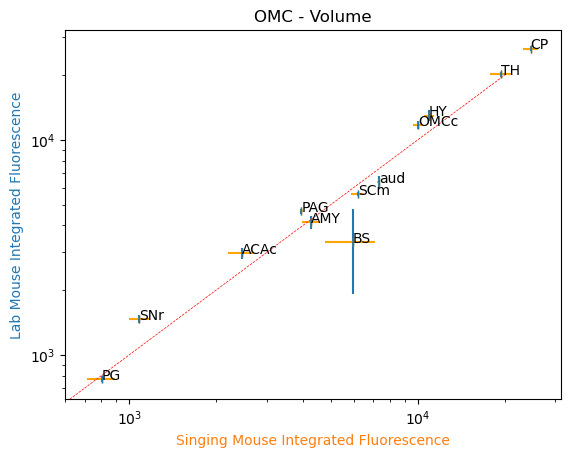

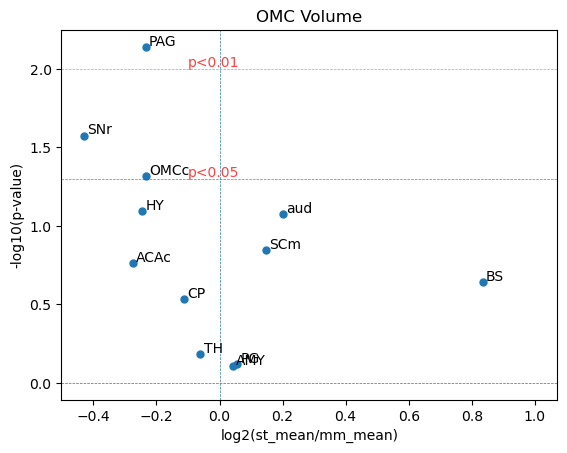

In [22]:
# Volume
# scatterplot
omc_fluor = all_fluor[all_fluor["inj_site"]=="OMC"]

stvmm_area_scatter(omc_fluor, title="OMC - Volume", to_plot="Volume_mm3")
plt.show()

#  Volcano plot
omc_ttest = df_ttest(omc_fluor, test_vals="Volume_mm3")
volcano_plot(omc_ttest, title="OMC Volume")
plt.show()

/tmp/ipykernel_2277506/372621568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omc_fluor["Fluor/Vol"] = omc_fluor["Fluorescence"]/omc_fluor["Volume_mm3"]


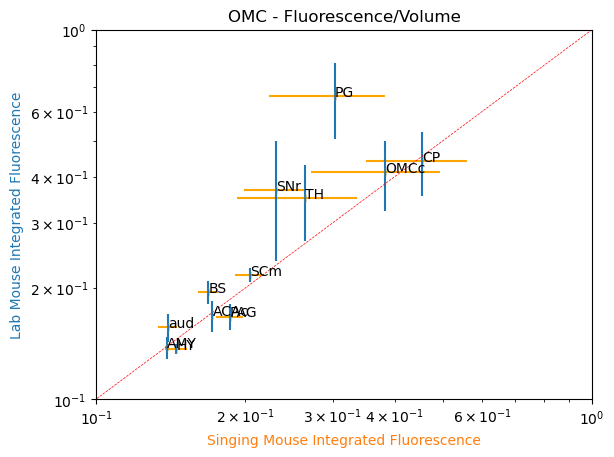

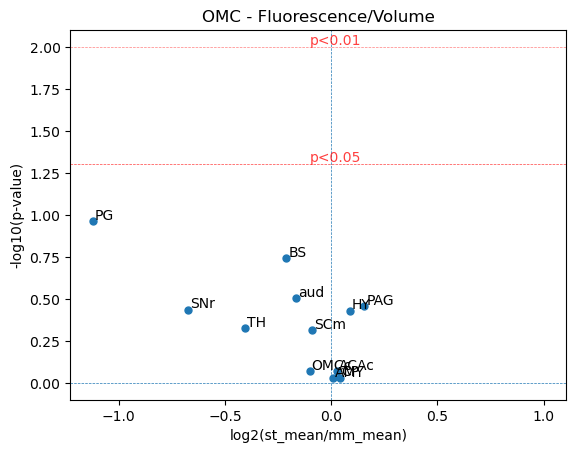

In [30]:
# flourescence/volume

# scatterplot
omc_fluor = all_fluor[all_fluor["inj_site"]=="OMC"]
omc_fluor["Fluor/Vol"] = omc_fluor["Fluorescence"]/omc_fluor["Volume_mm3"]

stvmm_area_scatter(omc_fluor, title="OMC - Fluorescence/Volume", to_plot="Fluor/Vol",
                   ax_limits=(0.1,1))
plt.show()

#  Volcano plot
omc_ttest = df_ttest(omc_fluor, test_vals="Fluor/Vol")
volcano_plot(omc_ttest, title="OMC - Fluorescence/Volume")
plt.show()

## ACA

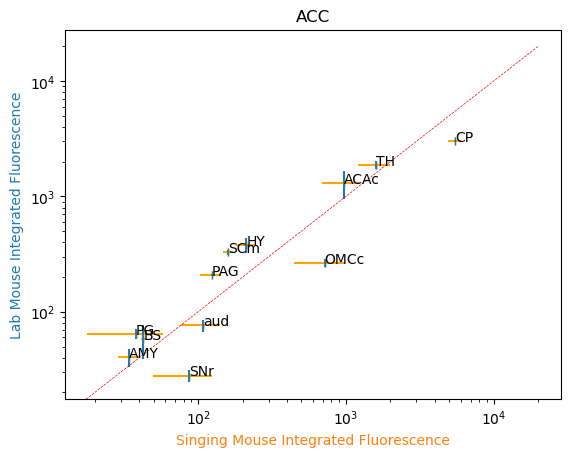

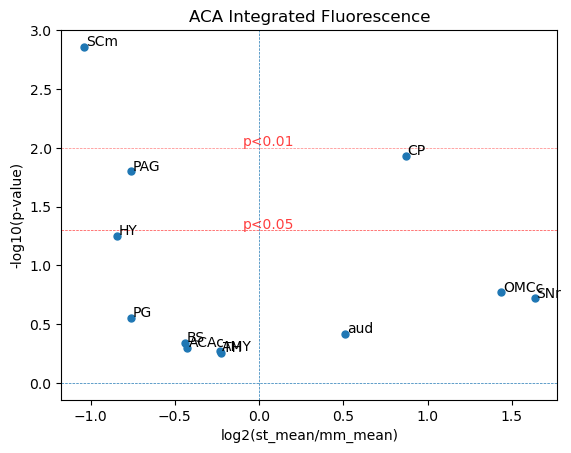

/tmp/ipykernel_2277506/391173142.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aca_fluor["Fluor/Vol"] = aca_fluor["Fluorescence"]/aca_fluor["Volume_mm3"]


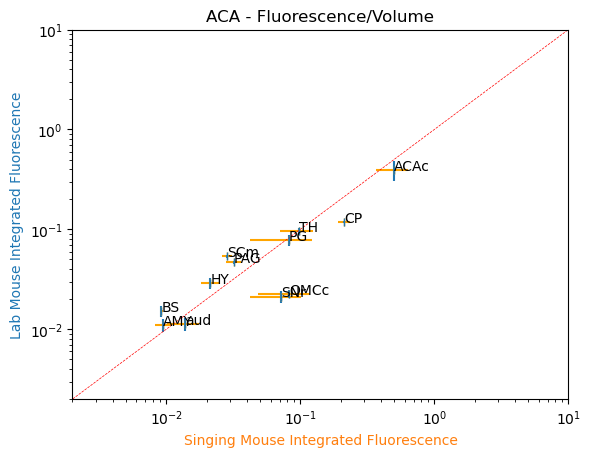

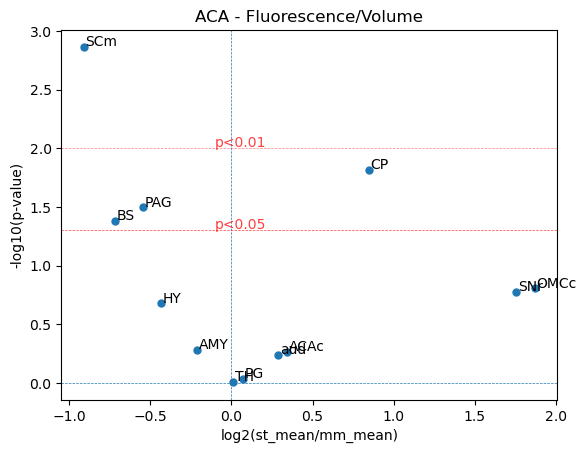

In [33]:
# scatterplot
aca_fluor = all_fluor[all_fluor["inj_site"]=="ACC"]

stvmm_area_scatter(aca_fluor, title="ACC")
plt.show()

#  Volcano plot
aca_ttest = df_ttest(aca_fluor)
volcano_plot(aca_ttest, title="ACA Integrated Fluorescence")
plt.show()

# flourescence/volume

# scatterplot
aca_fluor["Fluor/Vol"] = aca_fluor["Fluorescence"]/aca_fluor["Volume_mm3"]

stvmm_area_scatter(aca_fluor, title="ACA - Fluorescence/Volume", to_plot="Fluor/Vol",
                   ax_limits=(0.002, 10))
plt.show()

#  Volcano plot
aca_ttest = df_ttest(aca_fluor, test_vals="Fluor/Vol")
volcano_plot(aca_ttest, title="ACA - Fluorescence/Volume")
plt.show()

# OMC vs. ACA
- trying to make the point that method can determine differences

## STeg

## MMus

# Inter vs. Intra species
- should see that b/w species (inter) diff are larger that within species (intra) diff

## OMC

In [38]:
d1 = compare_groups(omc_fluor, group1="MMus", group2="STeg",
                    to_compare="Fluorescence", label="inter")
d2

,area,Fluorescence_diff,species,brain,label
0,OMCc,3908.38396,MMus_STeg,OMC_MMus_220119_b0_OMC_STeg_220208_b0,inter
1,OMCc,3505.22111,MMus_STeg,OMC_MMus_220119_b0_OMC_STeg_220411_b1,inter
2,OMCc,400.68657,MMus_STeg,OMC_MMus_220119_b0_OMC_STeg_220429_b2,inter
3,OMCc,1662.59812,MMus_STeg,OMC_MMus_220303_b1_OMC_STeg_220208_b0,inter
4,OMCc,1259.43527,MMus_STeg,OMC_MMus_220303_b1_OMC_STeg_220411_b1,inter
...,...,...,...,...,...
103,BS,889.37787,MMus_STeg,OMC_MMus_220303_b1_OMC_STeg_220411_b1,inter
104,BS,506.98026,MMus_STeg,OMC_MMus_220303_b1_OMC_STeg_220429_b2,inter
105,BS,649.79315,MMus_STeg,OMC_MMus_220324_b2_OMC_STeg_220208_b0,inter
106,BS,486.73727,MMus_STeg,OMC_MMus_220324_b2_OMC_STeg_220411_b1,inter


## ACA